In [ ]:

# Term Deposit Prediction - EDA
# Dataset: Banking_data.csv-

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel")

# Load dataset
df = pd.read_csv('/banking_data.csv')
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


---
### **1. Distribution of Age among the clients**

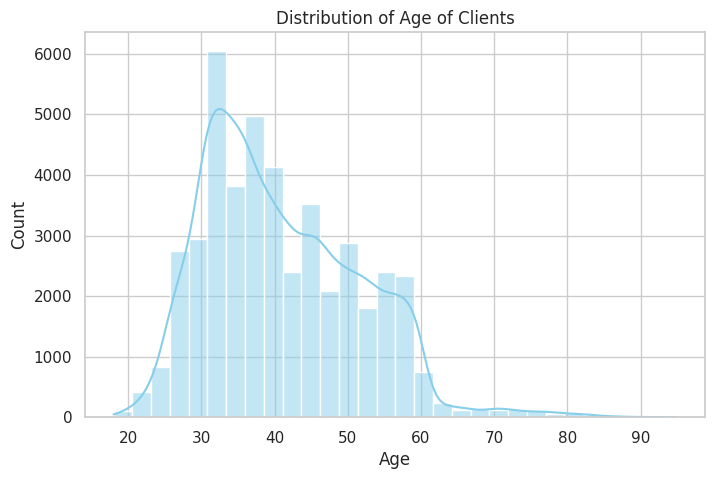

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age of Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Answer:** Most clients are between 30–40 years old.

---
### **2. Job type variation among the clients**

/tmp/ipython-input-3532460457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='viridis')


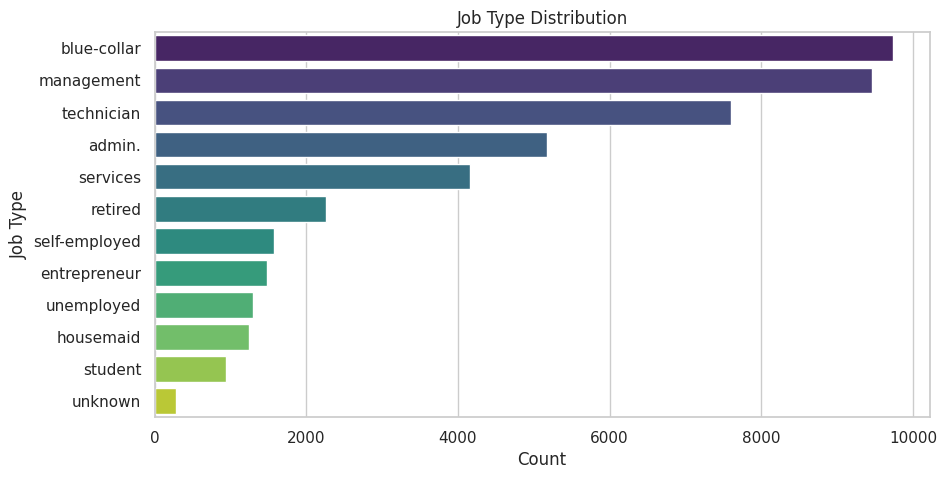

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index, palette='viridis')
plt.title('Job Type Distribution')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

**Answer:** Most common job is 'blue-collar'; least common is 'student' and 'unknown'.

---
### **3. Marital status distribution**

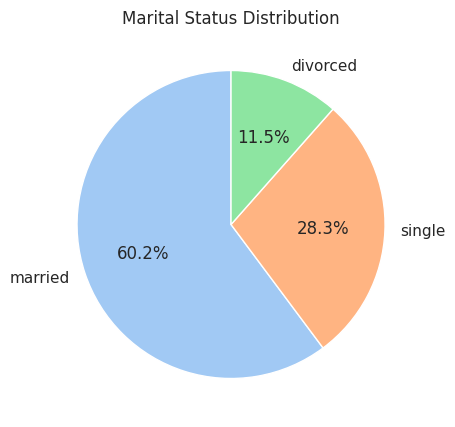

In [ ]:
plt.figure(figsize=(5,5))
df['marital'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title('Marital Status Distribution')
plt.show()

**Answer:** Majority are married (60.2%), followed by single (28.2%) and divorced (11.6%).

---
### **4. Level of education among clients**

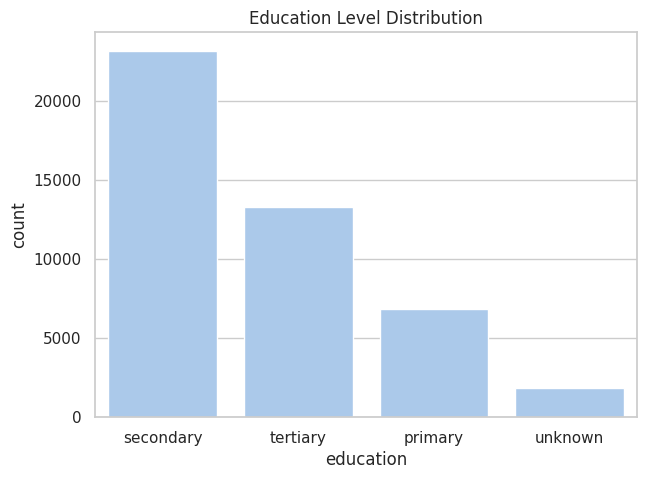

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='education', data=df, order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.show()

**Answer:** Most clients have secondary education; few have unknown education.

---
### **5. Proportion of clients with credit in default**

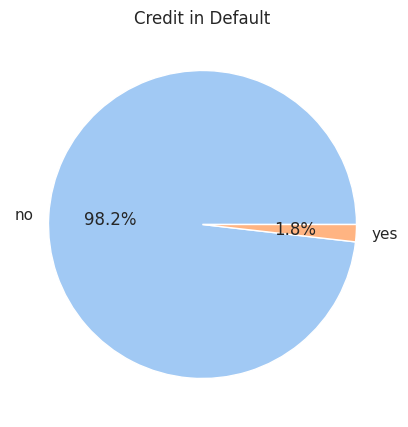

In [ ]:
plt.figure(figsize=(5,5))
df['default'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Credit in Default')
plt.ylabel('')
plt.show()

**Answer:** Very few clients have credit in default (1.5%).

---
### **6. Distribution of average yearly balance**

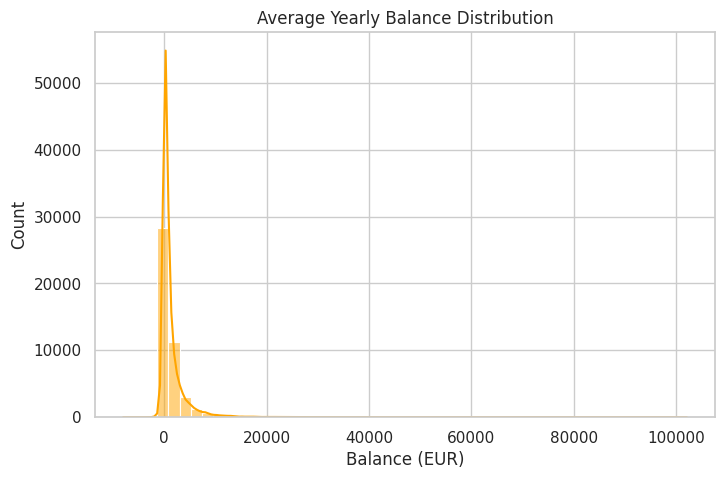

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['balance'], bins=50, kde=True, color='orange')
plt.title('Average Yearly Balance Distribution')
plt.xlabel('Balance (EUR)')
plt.show()

**Answer:** Balances are right-skewed; most clients have low balances.

---
### **7 & 8. Clients with housing and personal loans**

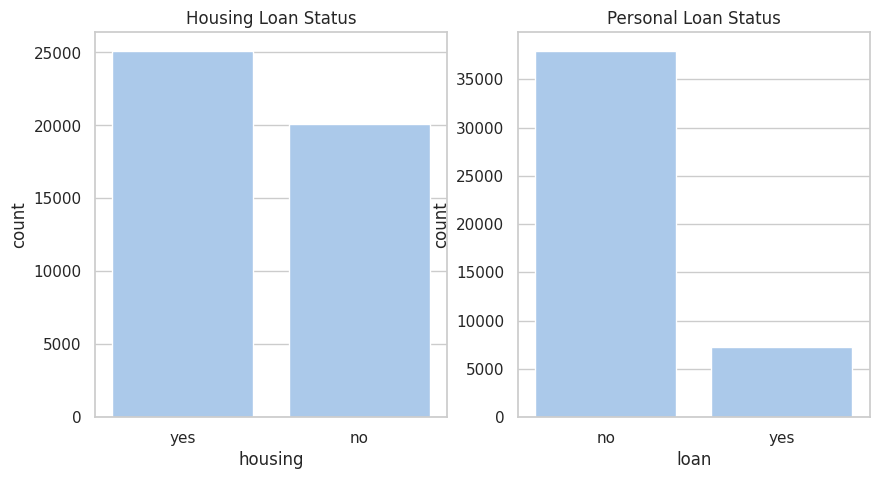

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x='housing', data=df, ax=ax[0])
ax[0].set_title('Housing Loan Status')
sns.countplot(x='loan', data=df, ax=ax[1])
ax[1].set_title('Personal Loan Status')
plt.show()

**Answer:** Housing loans are more common than personal loans.

---
### **9. Communication types used**

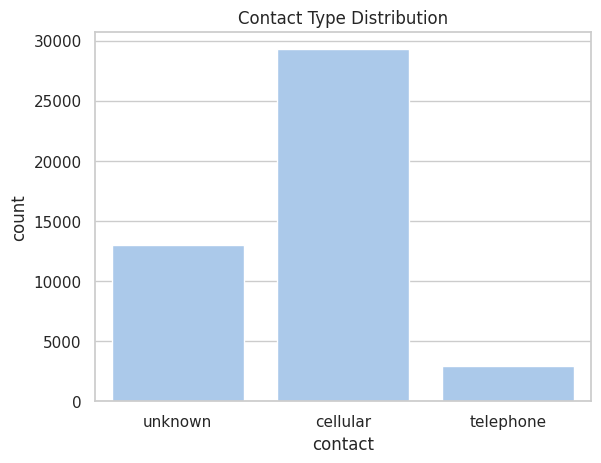

In [ ]:
sns.countplot(x='contact', data=df)
plt.title('Contact Type Distribution')
plt.show()

**Answer:** Most clients are contacted via cellular; few via telephone or unknown.

---
### **10. Distribution of last contact day**

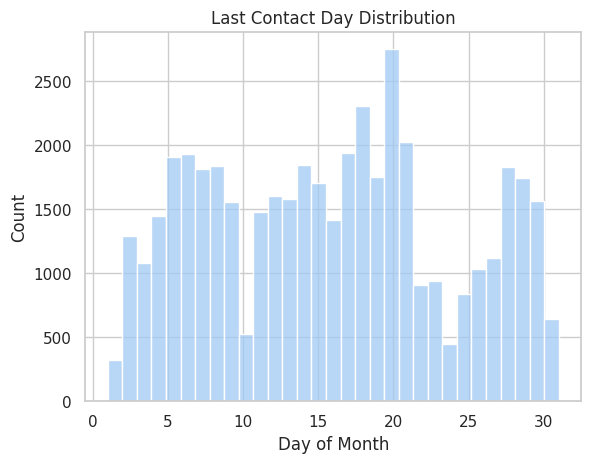

In [ ]:
sns.histplot(df['day'], bins=31)
plt.title('Last Contact Day Distribution')
plt.xlabel('Day of Month')
plt.show()

**Answer:** Contacting is concentrated on certain days.

---
### **11. Last contact month variation**

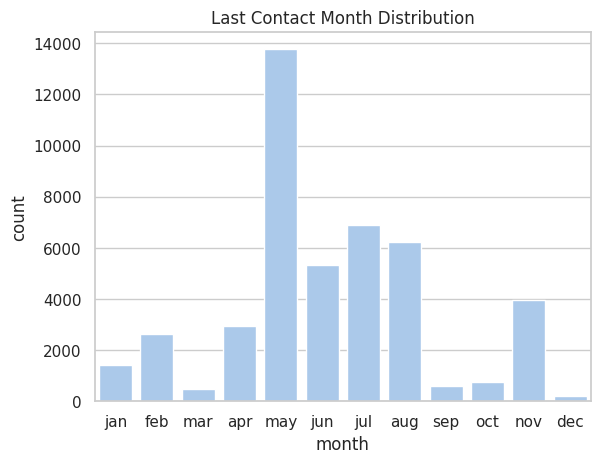

In [ ]:
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.countplot(x='month', data=df, order=month_order)
plt.title('Last Contact Month Distribution')
plt.show()

**Answer:** Campaigns are mainly concentrated in months 'may' and 'jul'.

---
### **12. Distribution of last contact duration**

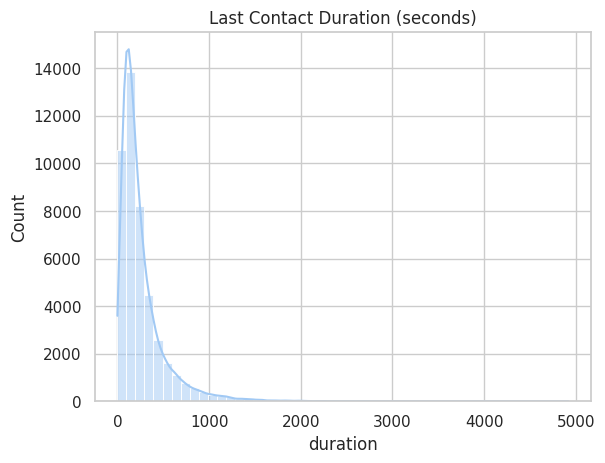

In [ ]:
sns.histplot(df['duration'], bins=50, kde=True)
plt.title('Last Contact Duration (seconds)')
plt.show()

**Answer:** Most calls are short; few last very long.

---
### **13. Contacts performed during current campaign**

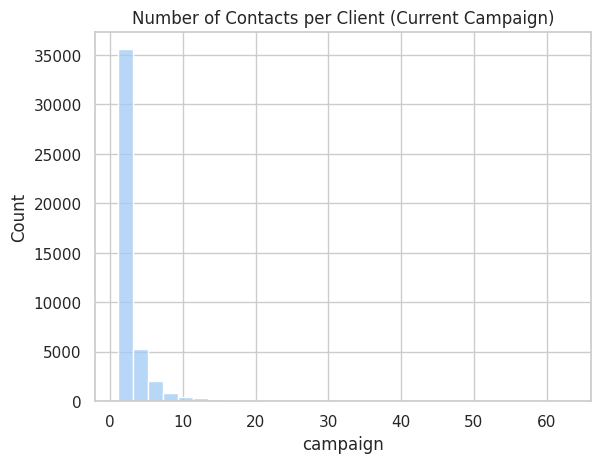

In [ ]:
sns.histplot(df['campaign'], bins=30)
plt.title('Number of Contacts per Client (Current Campaign)')
plt.show()

**Answer:** Most clients are contacted 1–3 times.

---
### **14. Distribution of pdays (days since last contact)**

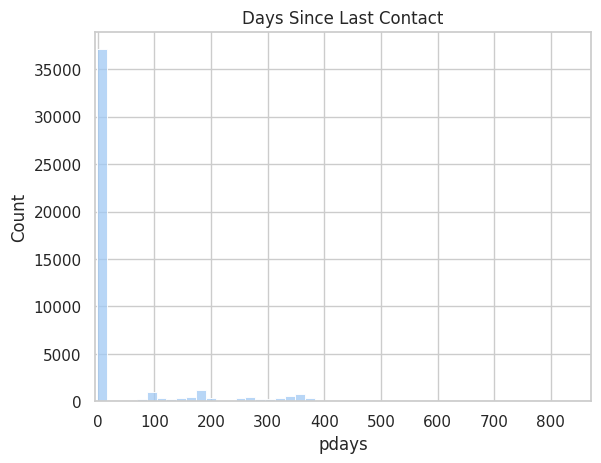

In [ ]:
sns.histplot(df['pdays'], bins=50)
plt.title('Days Since Last Contact')
plt.xlim(-5, df['pdays'].max())
plt.show()

**Answer:** Most values are -1, meaning no previous contact.

---
### **15. Contacts performed before current campaign**

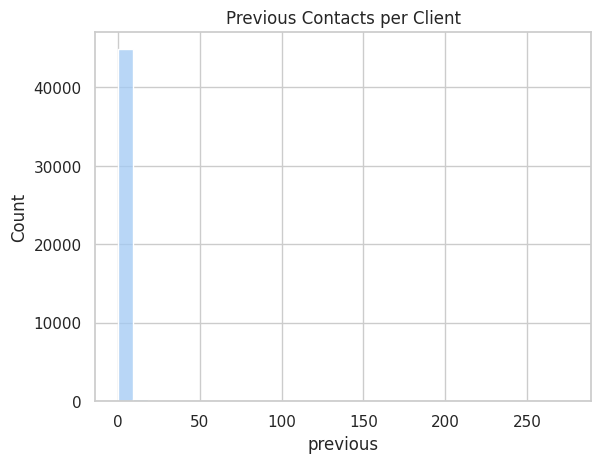

In [ ]:
sns.histplot(df['previous'], bins=30)
plt.title('Previous Contacts per Client')
plt.show()

**Answer:** Most clients were never contacted before.

---
### **16. Outcomes of previous marketing campaigns**

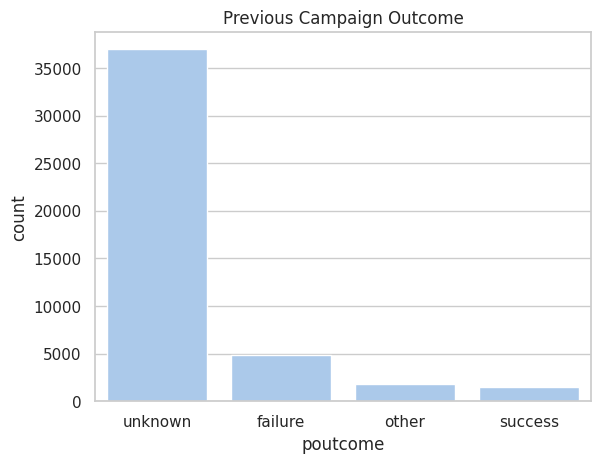

In [ ]:
sns.countplot(x='poutcome', data=df)
plt.title('Previous Campaign Outcome')
plt.show()

**Answer:** Majority are 'unknown' or 'failure', very few 'success'.

---
### **17. Subscription to term deposit**

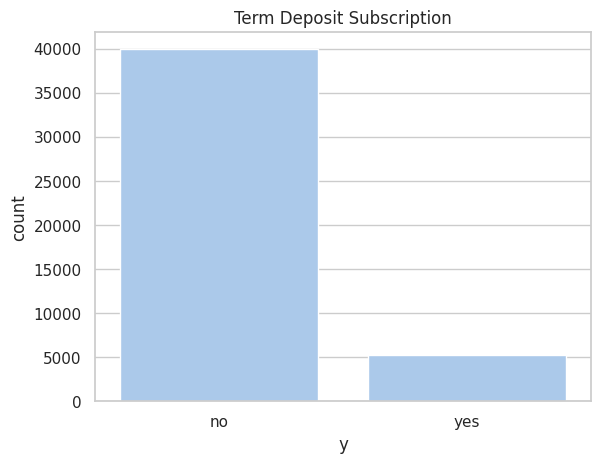

In [ ]:
sns.countplot(x='y', data=df)
plt.title('Term Deposit Subscription')
plt.show()

**Answer:** Dataset is imbalanced; majority did not subscribe.

---
### **18. Correlation with subscription**

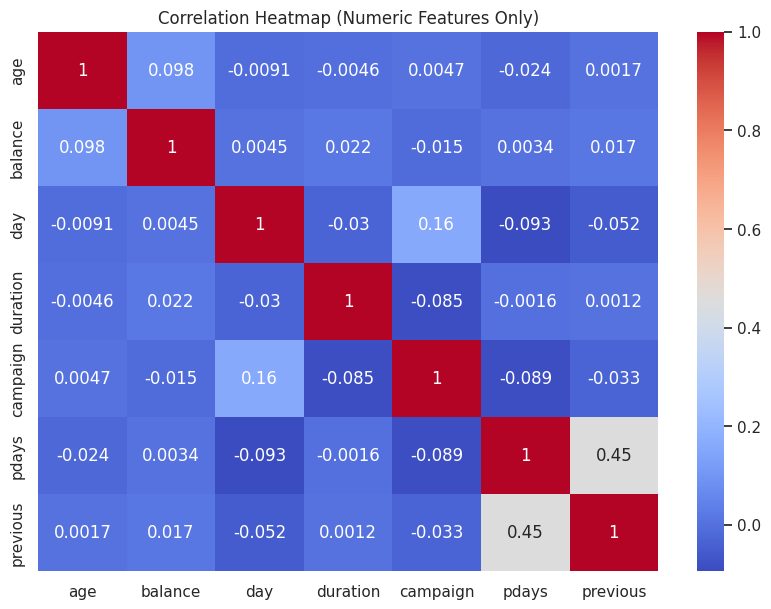

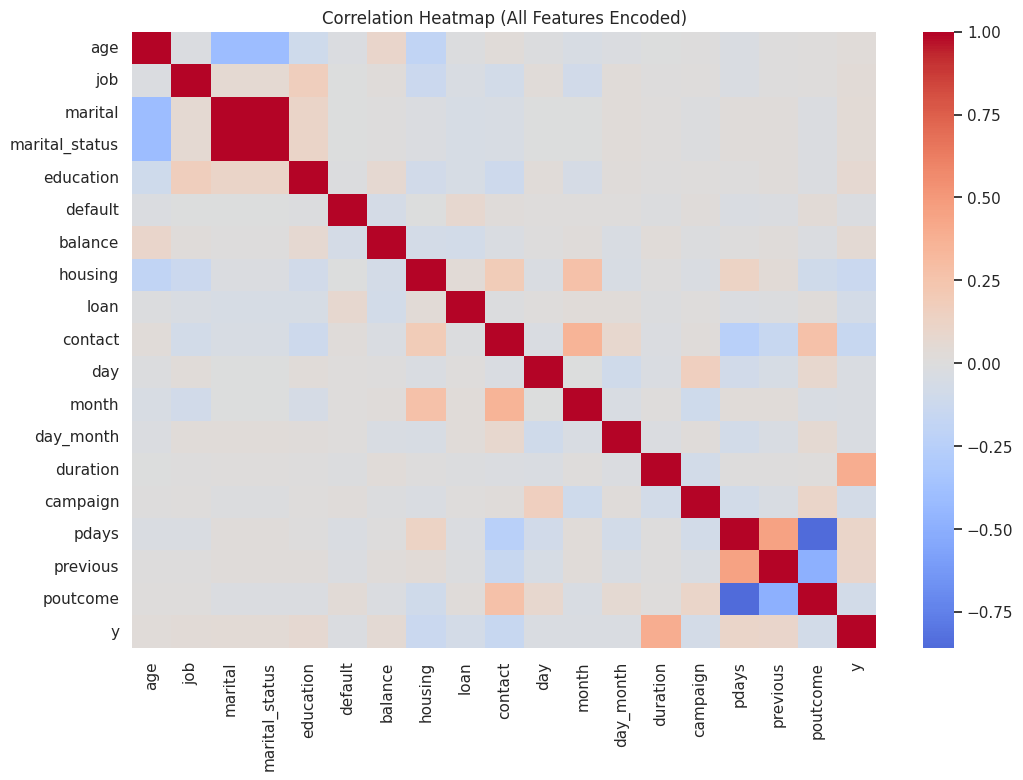

In [ ]:
# 18A. Correlation with numeric features only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

# 18B. Encode categorical columns to check correlations for all features
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (All Features Encoded)')
plt.show()